In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('spain_summer_songs.csv')

/var/folders/v5/90hqz_xs4ys1hl5xzb98xyh40000gn/T/ipykernel_12319/3075018375.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix


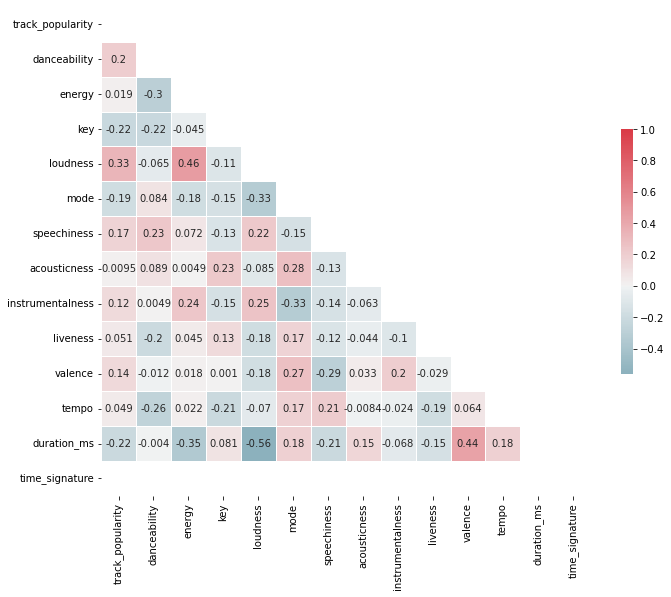

In [38]:
only_numerical = df.select_dtypes(include=np.number)

 ## correlates between the measures in the dataframe

corr = only_numerical.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix
# np.triu - makes an array which the upper right part of the rectangle is true and the bottom left is false  


#the colors you like
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

In [39]:
all_popular = pd.read_csv('all_popular_csv.csv')

In [40]:
all_popular_feat = all_popular[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

In [41]:
all_popular_feat.mean()

danceability      0.650359
energy            0.679280
key               5.386161
loudness         -6.533884
mode              0.622768
speechiness       0.074865
liveness          0.175310
valence           0.547496
tempo           119.307462
dtype: float64

In [42]:
all_popular_feat.std()

danceability     0.146215
energy           0.174448
key              3.647865
loudness         2.579474
mode             0.485236
speechiness      0.073866
liveness         0.138075
valence          0.237577
tempo           26.341175
dtype: float64

In [43]:
def scatters(x,y):

    
    plt.figure(figsize=(8, 8), dpi=80)


    plt.scatter(all_popular_feat[x],all_popular_feat[y])

    plt.xlabel(x)
    plt.ylabel(y)

    plt.show()

In [ ]:
lst = ['danceability','energy','loudness','speechiness','liveness','valence']


for item in range(len(lst)):
    for trait in lst:

        if lst[item] == trait:
            continue

        else:
            scatters(lst[item],trait)
            plt.show()

In [50]:
spain = pd.read_csv('spain_summer_songs.csv')

danceability


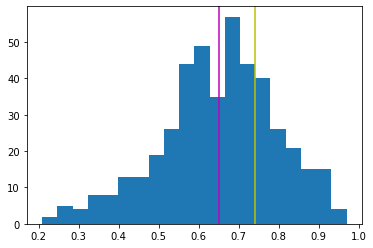

energy


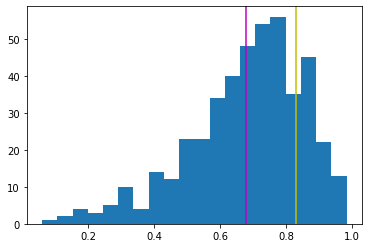

key


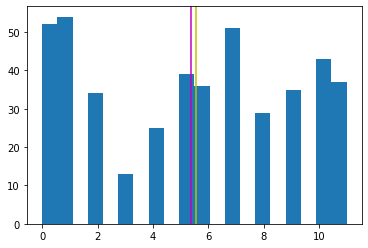

loudness


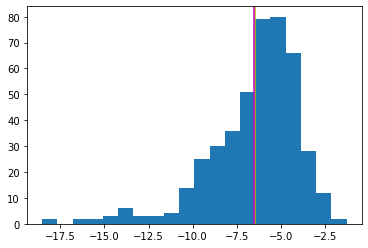

mode


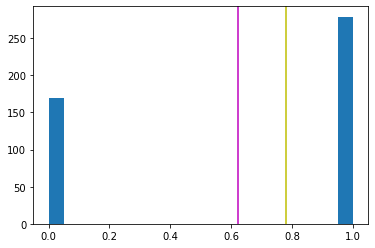

speechiness


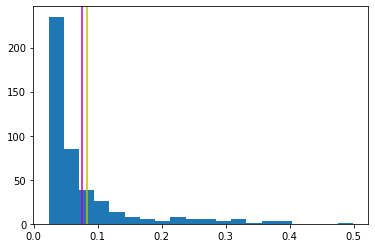

liveness


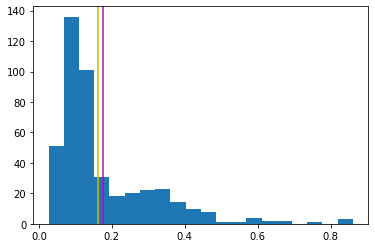

valence


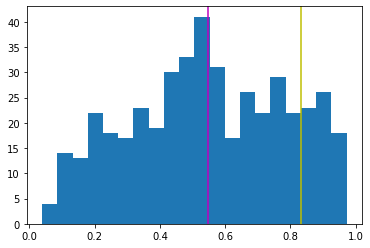

tempo


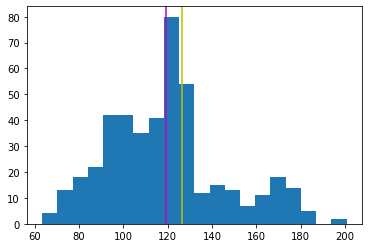

In [63]:
spain_feat = spain[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']]

list = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'liveness', 'valence', 'tempo']
spain_feat

for feat in list:
    print(feat)
    plt.axvline(x=spain_feat[feat].mean(), color='y', linestyle='-')
    plt.axvline(x=all_popular_feat[feat].mean(), color='m', linestyle='-')
    plt.hist(all_popular_feat[feat], bins=20)
    plt.show()

In [64]:
all_popular_feat['tempo'].min()

63.392